In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy2stl as np2stl

%matplotlib

Using matplotlib backend: Qt5Agg


## Generation facets from a random array 

In [6]:
mat = np.random.randint(20, high=30,  size=(10,10))
mat[2:6,2:6] = -1

facets= np2stl.numpy2stl(mat, solid=True, mask_val= 0)
vertices = np.array([[facet[3:6],facet[6:9],facet[9:12]] for facet in facets])

Creating top mesh...
Computing edges...
Creating Edges...
Creating bottom...


## View 3D object

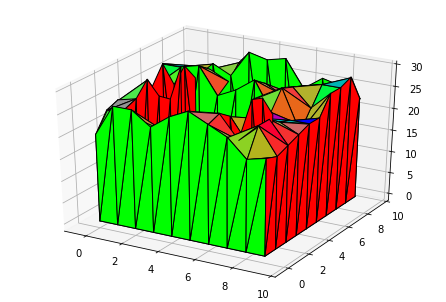

In [7]:
normals = np2stl.calculate_normals(vertices)
surfaces = np2stl.get_surfaces(vertices)

surf_color = np.array([np.abs(normals[surf[0]]) for surf in surfaces])

np2stl.draw_3D_vertices(vertices, surfaces=surfaces, surf_color=surf_color)

## Simplify 3D Object and View it 

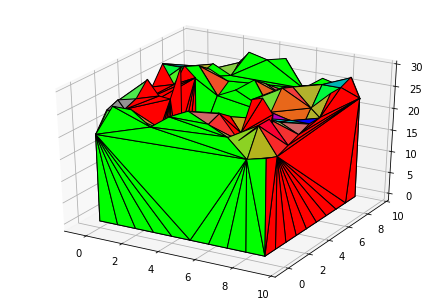

In [8]:
vertices_out = np2stl.simplify_object_3D(vertices)

normals = np2stl.calculate_normals(vertices_out)
surfaces = np2stl.get_surfaces(vertices_out)

surf_color = np.array([np.abs(normals[surf[0]]) for surf in surfaces])

np2stl.draw_3D_vertices(vertices_out, surfaces=surfaces, surf_color=surf_color )

In [15]:
%lprun -f np2stl.simplify_object_3D np2stl.simplify_object_3D(vertices)

In [14]:
%lprun -f np2stl.numpy2stl np2stl.numpy2stl(mat, solid=True, mask_val= 0)

Creating top mesh...
Computing edges...
Creating Edges...
Creating bottom...


## Use for editing modules

In [11]:
%load_ext autoreload
%autoreload 1
%load_ext line_profiler
%aimport numpy2stl